In [41]:
!pip install prophet
import pandas as pd
from prophet import Prophet
import numpy as np
import datetime
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [4]:
denver_data_df = pd.read_excel(Path("./Denver_data.xlsx"))
display(denver_data_df.head())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,...,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00
0,273809,239,Gateway - Green Valley Ranch,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,170605.166156,...,514126.894827,514510.823226,512664.297921,509193.322848,505444.556443,501582.699830,497414.917334,493412.190805,491308.739173,491820.075393
1,6018,343,Montbello,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,157862.284585,...,456508.457679,456984.452424,455972.026667,453996.956985,451788.606320,449204.637266,446257.550263,444152.360345,442475.084855,441748.926600
2,275564,425,Central Park,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,NaN,...,867924.977486,867558.640471,861415.013190,853997.843883,850566.616921,849319.512744,846973.181690,837216.399037,825264.110154,814675.040903
3,268671,627,Hampden,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,178658.557732,...,551403.107123,550836.282218,546715.338081,541190.407092,537368.210871,534717.389195,531790.064500,530502.469939,530110.332967,531733.147762
4,268662,707,Five Points,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,178255.530860,...,660671.281068,662324.869044,658658.818741,651772.197321,646421.037727,642735.116885,639096.937130,635629.017682,633765.137527,634187.367596


In [5]:
display(denver_data_df.tail())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,...,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00
71,268646,7108,Country Club,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,501997.693856,...,1.672542e+06,1.673506e+06,1.662289e+06,1.646748e+06,1.634060e+06,1.630004e+06,1.625570e+06,1.619955e+06,1.612840e+06,1.609399e+06
72,268638,8078,Civic Center,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,NaN,...,6.258968e+05,6.265957e+05,6.243636e+05,6.196860e+05,6.167341e+05,6.145489e+05,6.124147e+05,6.105905e+05,6.092033e+05,6.085215e+05
73,403515,8392,Rosedale,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,200711.922882,...,7.271955e+05,7.270109e+05,7.218766e+05,7.149270e+05,7.101369e+05,7.067962e+05,7.027214e+05,7.000135e+05,6.978134e+05,6.978707e+05
74,268652,9749,Denver International Airport,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,NaN,...,3.995811e+05,4.010358e+05,4.003201e+05,3.984669e+05,3.963176e+05,3.941062e+05,3.917056e+05,3.894079e+05,3.884249e+05,3.887271e+05
75,276193,18251,Auraria,neighborhood,CO,CO,Denver,"Denver-Aurora-Lakewood, CO",Denver County,NaN,...,8.137228e+05,8.144746e+05,8.106853e+05,8.060523e+05,8.052924e+05,8.071125e+05,8.091571e+05,8.097902e+05,8.097494e+05,8.097040e+05


In [6]:
denver = denver_data_df.drop(columns=['RegionID', 'SizeRank','RegionType', 'StateName', 'State', 'CountyName','Metro', 'City'])

In [7]:
denver

,RegionName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,...,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00
0,Gateway - Green Valley Ranch,170605.166156,171318.732522,172143.548967,174204.199000,176409.203508,178831.158830,180953.796354,183113.224377,185387.054427,...,5.141269e+05,5.145108e+05,5.126643e+05,5.091933e+05,5.054446e+05,5.015827e+05,4.974149e+05,4.934122e+05,4.913087e+05,4.918201e+05
1,Montbello,157862.284585,158741.360236,159610.786557,161742.969035,164027.063010,166587.698606,169050.386070,171542.649032,174075.227635,...,4.565085e+05,4.569845e+05,4.559720e+05,4.539970e+05,4.517886e+05,4.492046e+05,4.462576e+05,4.441524e+05,4.424751e+05,4.417489e+05
2,Central Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679250e+05,8.675586e+05,8.614150e+05,8.539978e+05,8.505666e+05,8.493195e+05,8.469732e+05,8.372164e+05,8.252641e+05,8.146750e+05
3,Hampden,178658.557732,179586.871840,180705.251701,183283.220839,186009.055192,188777.137940,191268.549982,193682.276342,196127.130720,...,5.514031e+05,5.508363e+05,5.467153e+05,5.411904e+05,5.373682e+05,5.347174e+05,5.317901e+05,5.305025e+05,5.301103e+05,5.317331e+05
4,Five Points,178255.530860,179947.029340,181241.969206,184819.334036,188834.482988,193148.403774,197729.090694,202348.002082,206745.902581,...,6.606713e+05,6.623249e+05,6.586588e+05,6.517722e+05,6.464210e+05,6.427351e+05,6.390969e+05,6.356290e+05,6.337651e+05,6.341874e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Country Club,501997.693856,504791.630488,507882.068002,514617.642115,521622.324266,528592.802142,533950.325347,539110.665723,545078.519720,...,1.672542e+06,1.673506e+06,1.662289e+06,1.646748e+06,1.634060e+06,1.630004e+06,1.625570e+06,1.619955e+06,1.612840e+06,1.609399e+06
72,Civic Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.258968e+05,6.265957e+05,6.243636e+05,6.196860e+05,6.167341e+05,6.145489e+05,6.124147e+05,6.105905e+05,6.092033e+05,6.085215e+05
73,Rosedale,200711.922882,202193.984675,203819.135778,207690.139752,211480.969946,215056.092663,218325.785050,221779.979021,225569.183756,...,7.271955e+05,7.270109e+05,7.218766e+05,7.149270e+05,7.101369e+05,7.067962e+05,7.027214e+05,7.000135e+05,6.978134e+05,6.978707e+05
74,Denver International Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.995811e+05,4.010358e+05,4.003201e+05,3.984669e+05,3.963176e+05,3.941062e+05,3.917056e+05,3.894079e+05,3.884249e+05,3.887271e+05


In [8]:
dates = pd.date_range(start='1/31/2000', end='3/31/2023', freq='M')
prices = [177010.6266, 178027.5027, 179078.3151, 181640.7466]

In [9]:
prices += [float('nan')] * (len(dates) - len(prices))

In [10]:
denver = pd.DataFrame({'Date': dates, 'Denver County': prices})
denver.set_index('Date', inplace=True)

In [11]:
denver.fillna(method='ffill', inplace=True)

In [12]:
print(denver)

            Denver County
Date                     
2000-01-31    177010.6266
2000-02-29    178027.5027
2000-03-31    179078.3151
2000-04-30    181640.7466
2000-05-31    181640.7466
...                   ...
2022-11-30    181640.7466
2022-12-31    181640.7466
2023-01-31    181640.7466
2023-02-28    181640.7466
2023-03-31    181640.7466

[279 rows x 1 columns]


In [ ]:
X = denver.index
y = denver['Denver County']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy().reshape(-1,1), y, test_size=0.2, random_state=42)

In [19]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=90)

In [20]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=90)

In [21]:
y_pred = model.predict(X_test)

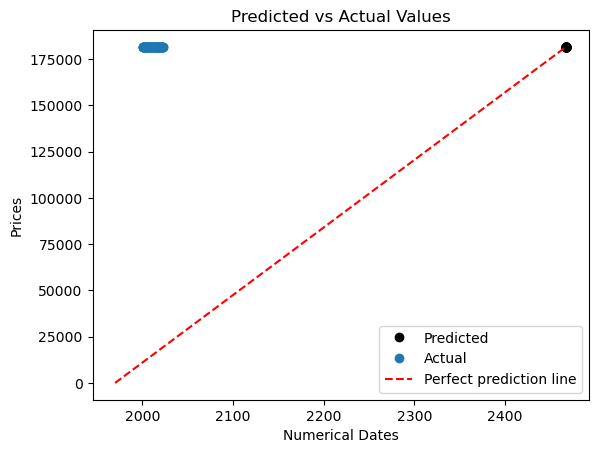

In [28]:
plt.plot(y_test, y_pred,'o', color='black', label='Predicted')
plt.plot(X_test, y_test, 'o', label='Actual')
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red', label='Perfect prediction line')
plt.xlabel('Numerical Dates')
plt.ylabel('Prices')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [23]:
model2 = Sequential()

In [24]:
model2.add(Dense(10, input_shape=(2,), activation='relu'))
model2.add(Dense(1, activation='linear'))

In [25]:
model2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

In [26]:
X2 = np.random.rand(100, 2)
y2 = np.random.rand(100, 1)

In [27]:
mse_history = model2.fit(X2, y2, epochs=50, validation_split=0.2).history['val_loss']

Epoch 1/50
3/3 [==============================] - 0s 49ms/step - loss: 0.4830 - val_loss: 0.3402
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3327 - val_loss: 0.2197
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2177 - val_loss: 0.1362
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1401 - val_loss: 0.0877
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0978 - val_loss: 0.0720
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0924 - val_loss: 0.0768
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0992 - val_loss: 0.0847
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1077 - val_loss: 0.0864
Epoch 9/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1067 - val_loss: 0.0810
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0999 - val_loss: 0.0744
Epoch 11/50
3/3 [=====================

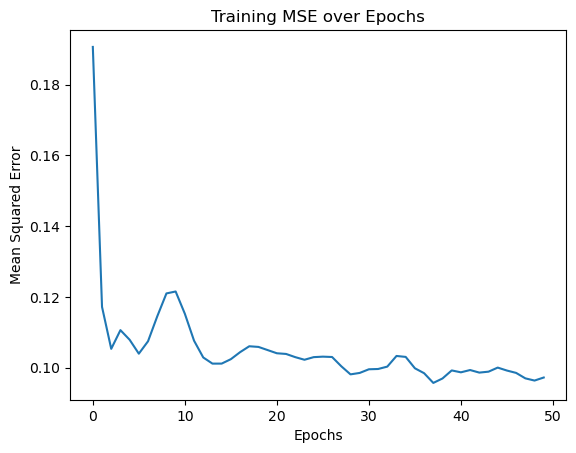

In [288]:
plt.plot(mse_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training MSE over Epochs')
plt.show()